In [8]:
import pandas as pd
import numpy as np

data=pd.read_csv('train.csv')
data.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [14]:
# header에 대한 설명
pd.read_csv('data_info.csv')

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [16]:
# 데이터에 null값이 있는지 체크 (road_name에 -기호로 결측치가 표기되어있습니다.)
data.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [17]:
# 도로의 차량 평균 속도를 통해 교통량을 간단하게 가정
# 차량 평균 속도가 높으면 교통량이 적고, 차량 평균 속도가 낮으면 교통량이 많다고 가정
# 차량 평균 속도에 따라 교통량을 0~1 사이의 값으로 정의
data['traffic']=(np.max(data['target'])-data['target'])/(np.max(data['target'])-np.min(data['target']))
data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,traffic
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,0.544643
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,0.741071
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,0.464286
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,0.830357
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,0.669643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,0.830357
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,0.428571
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,0.741071
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,0.357143


<Axes: xlabel='base_hour', ylabel='traffic'>

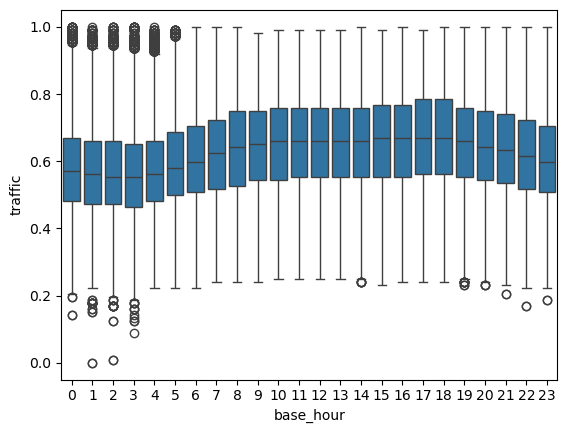

In [18]:
# Q1
# boxplot 출력
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='base_hour', y='traffic', data=data)

In [19]:
# 시각적으로 확인했을때, 18시와 같은 오후 시간에는 교통량이 많은 것으로 보이고,
# 3시와 같은 새벽 시간에는 교통량이 적은 것으로 확인됩니다.
# 따라서 시간에 따라 교통량이 차이가 있다고 생각할 수 있습니다.

<Axes: xlabel='day_of_week', ylabel='traffic'>

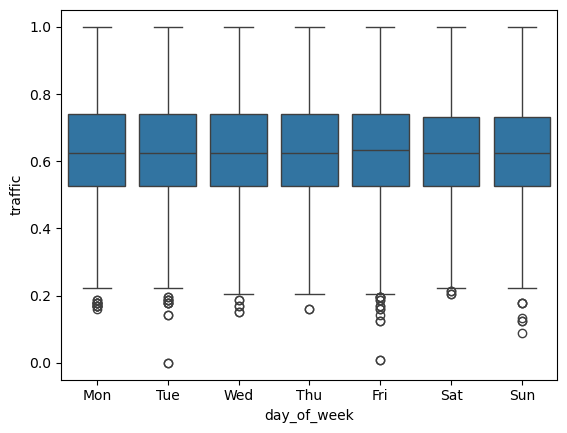

In [24]:
# Q2
# 한글인 요일 이름을 영어로 변경하고 boxplot을 출력
day_mapping = {
    '월': 'Mon',
    '화': 'Tue',
    '수': 'Wed',
    '목': 'Thu',
    '금': 'Fri',
    '토': 'Sat',
    '일': 'Sun'
}

data['day_of_week']=data['day_of_week'].replace(day_mapping)

sns.boxplot(x='day_of_week', y='traffic', data=data, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

In [30]:
# boxplot을 확인했을 때, 거의 모든 요일에 대해서 비슷한 분포를 보이지만
# 자세히 보면 평일과 주말의 교통량에 차이가 있는 것을 볼 수 있습니다.
# 대체적으로 주말에 교통량이 더 적은 것으로 확인됩니다.
# 따라서 요일별로 교통량의 차이가 있다고 생각할 수 있습니다.

In [32]:
# Q3
# 연월일이 있는 기존 데이터에서 연도+월만 남기도록 수정
temp=data['base_date'].astype(str)
data['year_month']=temp.str[:4] + '-' + temp.str[4:6]
year_month_and_traffic=data[['year_month','traffic']]
year_month_and_traffic

,year_month,traffic
0,2022-06,0.544643
1,2022-07,0.741071
2,2021-10,0.464286
3,2022-03,0.830357
4,2021-10,0.669643
...,...,...
4701212,2021-11,0.830357
4701213,2022-03,0.428571
4701214,2022-06,0.741071
4701215,2021-10,0.357143


<Axes: xlabel='year_month', ylabel='traffic'>

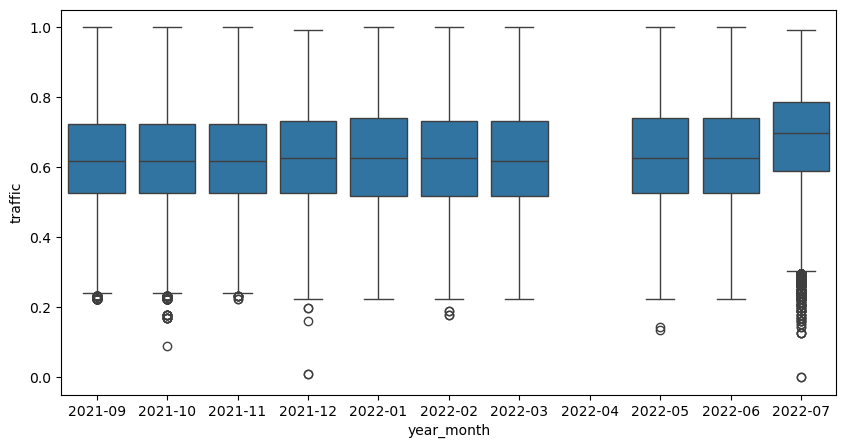

In [33]:
# boxplot 출력
plt.figure(figsize=(10,5))
sns.boxplot(x='year_month', y='traffic', data=data, order=['2021-09','2021-10','2021-11','2021-12',
                                                           '2022-01','2022-02','2022-03','2022-04',
                                                           '2022-05','2022-06','2022-07'])

In [40]:
# boxplot을 확인했을 때, 2022년 4월의 데이터가 없는 것을 확인했습니다.
# 또한 휴가 기간인 2022년 1월과 2022년 7월에 교통량이 비교적 많은 것으로 보이며
# 특히 2022년 7월에 교통량이 많았습니다.
# 2022년 외의 1월이나 7월 데이터를 알지 못하므로 경향성을 확실히 말할 수는 없지만
# 가지고 있는 데이터에서는 시간의 흐름에 따라 교통량 차이가 있다고 볼 수 있습니다.

<Axes: xlabel='lane_count', ylabel='traffic'>

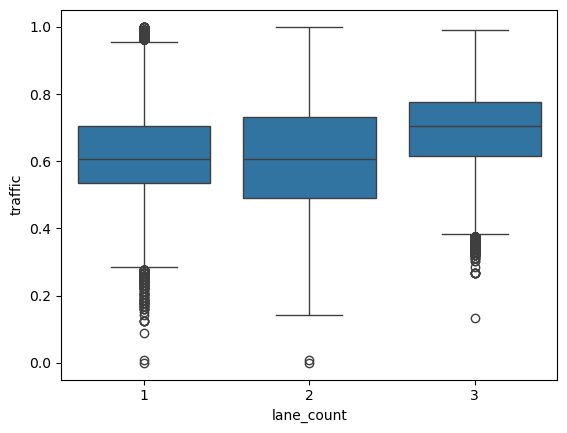

In [42]:
# Q4
# boxplot 출력
sns.boxplot(x='lane_count', y='traffic', data=data)

In [76]:
# boxplot을 확인했을 때, 3차선에서 가장 교통량이 많아지는 것을 확인할 수 있습니다.
# 교통량이 많을 것으로 예상이 되는 구간이기에 설계 단계에서 여러 차선을 계획했을 수도 있습니다.
# 결과적으로 lane_count의 차이가 교통량 차이와 관련이 있을 것이라고 볼 수 있습니다.

<Axes: xlabel='maximum_speed_limit', ylabel='traffic'>

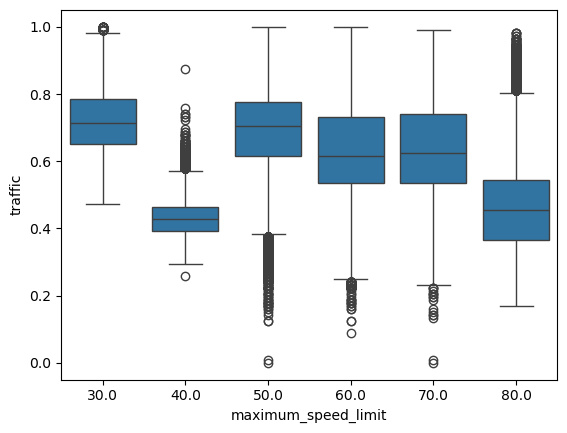

In [46]:
# Q5
# boxplot을 출력
sns.boxplot(x='maximum_speed_limit', y='traffic', data=data)

In [47]:
# 제한 속도가 40인 구간에서 교통량이 급격하게 낮아지는 이상 현상을 확인했습니다.
# 가정에 의해 교통량이 낮다는 것은 차량의 평균 속도가 빨랐다는 것을 의미합니다.
# 따라서 제한 속도가 40인 구간에서 속도가 빠른 차량이 많았다고 볼 수 있습니다.

<Axes: xlabel='maximum_speed_limit', ylabel='target'>

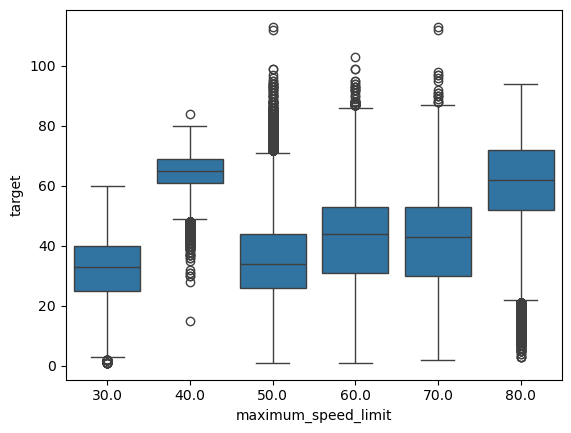

In [48]:
# 실제로 제한 속도 40인 구간에서 차량의 평균 속도가 40이 넘어가는 관측이 많았습니다.
sns.boxplot(x='maximum_speed_limit', y='target', data=data)

maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: count, dtype: int64


<Axes: xlabel='maximum_speed_limit', ylabel='count'>

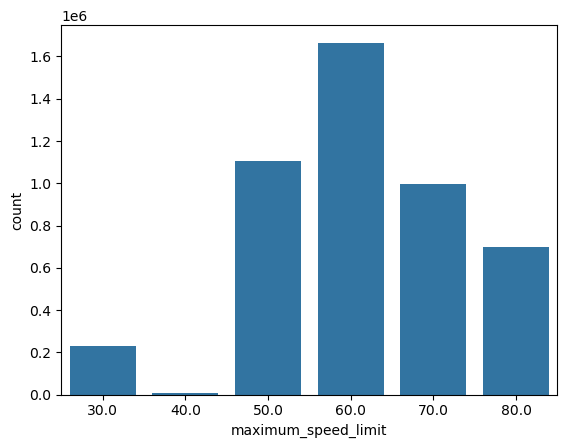

In [49]:
# 각 maximum_speed_limit별로 샘플의 개수를 확인
print(data['maximum_speed_limit'].value_counts())
sns.countplot(data=data, x='maximum_speed_limit')

In [50]:
# maximum_speed_limit이 40인 구간은 애초에 별로 존재하지 않아, 데이터의 양이 상대적으로 적은 편입니다.
# 적은 샘플은 통계적으로 신뢰하기 어려운 결과를 도출할 수 있기 때문에, 이런 현상이 관측될 수 있었을 것입니다.

In [51]:
# 제한속도가 40인 도로를 확인
print('제한속도가 40인 도로')
print(data[data['maximum_speed_limit']==40]['road_name'].unique())

제한속도가 40인 도로
['일반국도12호선' '일반국도95호선']


In [52]:
# 일반국도95호선의 제한속도들을 확인
print('일반국도95호선의 제한속도들')
print(data[data['road_name']=='일반국도95호선']['maximum_speed_limit'].unique())

일반국도95호선의 제한속도들
[80. 40.]


In [53]:
# 일반국도95호선은 기본적으로 제한속도가 80인 도로에서 일부 짧은 구간에 대해서 제한속도가 40으로 바뀌는 것으로 보입니다.
# 운전자가 이를 제대로 파악하지 못했다면 계속 제한속도 80을 생각하며 운전을 할 가능성이 있습니다.
# 따라서 maximum_speed_limit이 40인 구간에서 과속을 하여 교통량이 낮게 보일 수 있을 것이라고 생각합니다.

In [54]:
# Q6
# box plot으로 분포 확인이 불가능한 변수가 있습니다.

# id와 같은 경우, 모든 sample에 대한 고유한 값이며 그 순서가 교통량과 관계가 있는 값이 아니므로
# box plot으로 그렸을 때 교통량 분포 확인이 불가능합니다.

# vehicle_restricted와 height_restricted도 교통량 분포 확인이 불가능한 변수입니다.
# 이유로는 두 변수 모두 모든 샘플에서 0이라는 값만 가지고 있기 때문입니다.

In [82]:
# Q7
# Q1, Q2, Q3, Q4에서 다룬 변수 중에서 box plot을 그려보았을 때, 시각적으로 가장 교통량이 다르게 확인된
# base_hour와 lane_count가 교통량과 가장 상관이 클 것이라고 생각해 선택했습니다.

In [84]:
top2_variable=data[['base_hour','lane_count','traffic']]
top2_variable.head()

,base_hour,lane_count,traffic
0,17,1,0.544643
1,21,2,0.741071
2,7,2,0.464286
3,13,2,0.830357
4,8,2,0.669643


In [72]:
# 데이터를 heatmap에 사용할 수 있도록 pivot_table을 사용
pivot=top2_variable.pivot_table(index='base_hour', 
                          columns='lane_count',
                          values='traffic',
                          aggfunc='mean')
pivot.head()

lane_count,1,2,3
base_hour,,,
0,0.578907,0.552647,0.626782
1,0.570936,0.542376,0.618247
2,0.569082,0.535620,0.614356
3,0.565033,0.533789,0.611660
4,0.571396,0.543486,0.613917


<Axes: xlabel='lane_count', ylabel='base_hour'>

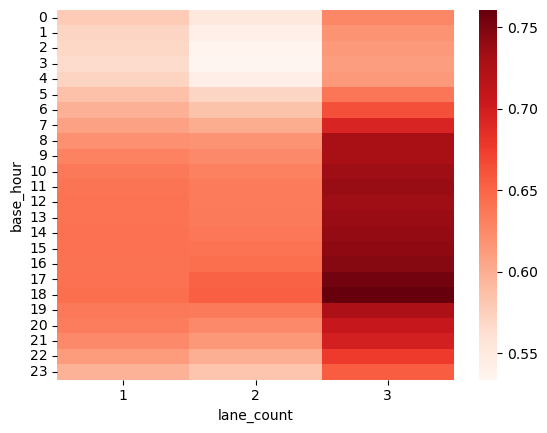

In [74]:
# 두 변수에 따른 교통량 heatmap 출력
sns.heatmap(pivot, cmap='Reds', cbar=True)

In [80]:
# 어떤 특성이 있는지
# 어두울수록 교통량이 많다고 보이는 그래프입니다.

# lane_count가 2인 경우 교통량이 가장 없는 것으로 확인됩니다.
# 이는 1차선에 비해 2차선이 차량을 2배 더 수용할 수 있기 때문에 발생한 현상으로 보입니다.
# 하지만 3차선에서는 차량의 양이 매우 많아 오히려 교통량이 많아진 것으로 보입니다.
# 애초에 교통량이 밀집될 구간을 3차선으로 설계했을 수 있습니다.

# base_hour 관점에서 보았을 때, 17~18시 사이에 교통량이 매우 많은 것으로 확인되는데,
# 이 시간대에는 2차선도 1차선 이상의 교통량을 가지는 것으로 보입니다.